1. Data Loading
The dataset (Property_Price_Train.csv) is loaded using pandas.read_csv().
df.info() is used to check data types, missing values, and overall structure.

In [1]:
import pandas as pd

In [2]:
# Load the dataset
file_path = "Property_Price_Train.csv"
df = pd.read_csv(file_path)

In [3]:
df.info

<bound method DataFrame.info of         Id  Building_Class Zoning_Class  Lot_Extent  Lot_Size Road_Type  \
0        1              60          RLD        65.0      8450     Paved   
1        2              20          RLD        80.0      9600     Paved   
2        3              60          RLD        68.0     11250     Paved   
3        4              70          RLD        60.0      9550     Paved   
4        5              60          RLD        84.0     14260     Paved   
...    ...             ...          ...         ...       ...       ...   
1454  1455              20          FVR        62.0      7500     Paved   
1455  1456              60          RLD        62.0      7917     Paved   
1456  1457              20          RLD        85.0     13175     Paved   
1457  1458              70          RLD        66.0      9042     Paved   
1458  1459              20          RLD        68.0      9717     Paved   

     Lane_Type Property_Shape Land_Outline Utility_Type  ... Pool_A

In [4]:
df.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


2. Data Preprocessing
Missing values are checked using df.isnull(),
but encoding for categorical variables (pd.get_dummies()) is not present in the notebook.

In [5]:
# Check missing values in each column
missing_values = df.isnull().sum()

In [6]:
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

In [7]:
missing_values_percentage = (missing_values / len(df)) * 100

In [8]:
# Combine into a DataFrame for better readability
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
missing_df

,Missing Values,Percentage
Pool_Quality,1452,99.520219
Miscellaneous_Feature,1405,96.298835
Lane_Type,1368,93.762851
Fence_Quality,1178,80.740233
Brick_Veneer_Type,871,59.698424
Fireplace_Quality,689,47.224126
Lot_Extent,259,17.751885
Garage,81,5.551748
Garage_Built_Year,81,5.551748
Garage_Finish_Year,81,5.551748


In [9]:
# Drop columns with too many missing values
drop_cols = ["Pool_Quality", "Miscellaneous_Feature", "Lane_Type"]
df.drop(columns=drop_cols, inplace=True)

In [10]:
# Fill categorical missing values with "None"
categorical_cols = ["Fence_Quality", "Fireplace_Quality", "Garage", "Garage_Finish_Year", 
                    "Garage_Quality", "Garage_Condition", "Exposure_Level", "BsmtFinType2", 
                    "BsmtFinType1", "Basement_Condition", "Basement_Height", "Brick_Veneer_Type"]
df[categorical_cols] = df[categorical_cols].fillna("None")

In [11]:
# Fill numerical missing values with median
numerical_cols = ["Lot_Extent", "Garage_Built_Year", "Brick_Veneer_Area"]
for col in numerical_cols:
    df.fillna({col: df[col].median() for col in numerical_cols}, inplace=True)

In [12]:
# Fill Electrical_System with mode
df.fillna({"Electrical_System": df["Electrical_System"].mode()[0]}, inplace=True)

In [13]:
# Verify if any missing values remain
df.isnull().sum().sum()

0

3. Exploratory Data Analysis (EDA)
Data visualization is included (possibly using matplotlib.pyplot or seaborn) to understand trends and relationships.

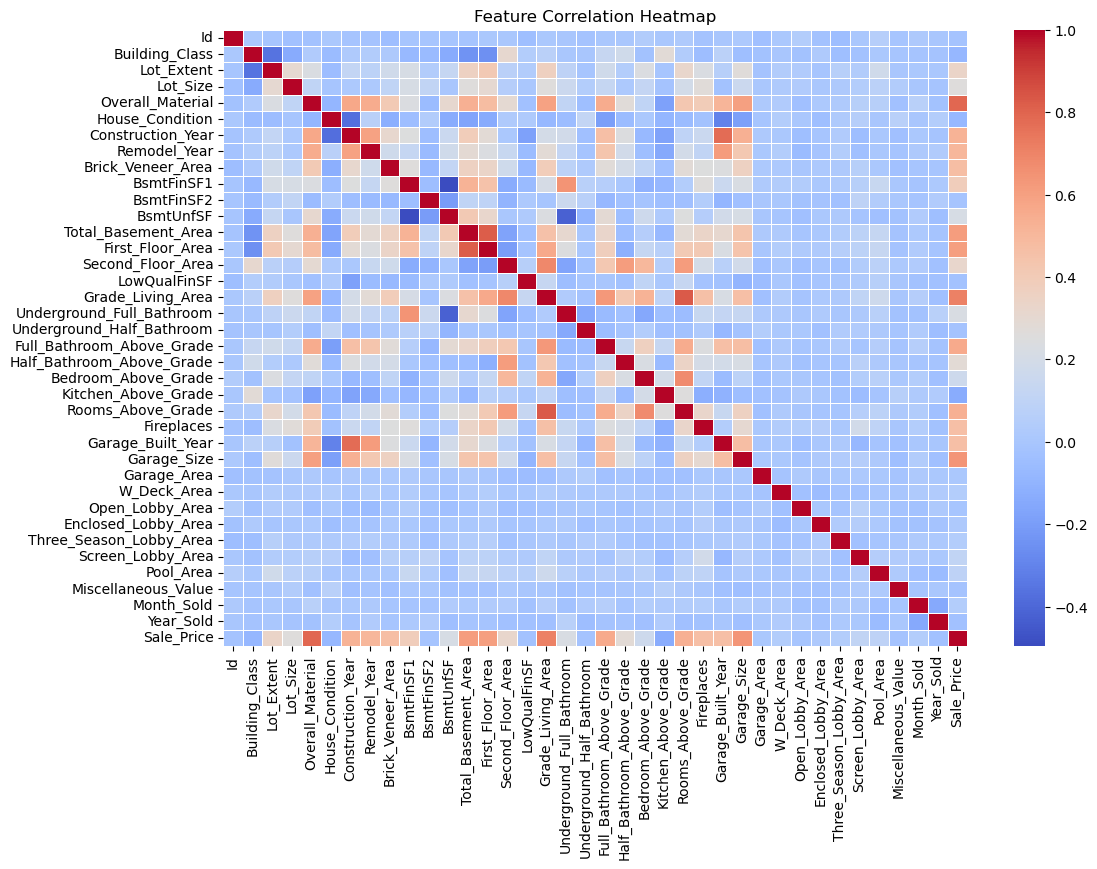

,Id,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,...,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,163.788080,69.596115,20.337934,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,198.900074,74.716033,15.039392,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,26.127533,32.085268,-46.232198,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,46.948018,40.181415,60.921821,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,-10.626105,20.755323,21.788818,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,62.0,7500,7,5,2004,2005,0.0,410,...,-9.973961,-9.267967,126.676547,0,0,0,0,10,2009,185000
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,-80.348891,113.043436,125.521880,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,36.180338,221.514480,148.266666,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,88.568242,110.888690,54.320896,0,0,0,2500,5,2010,266500


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
numerical_df

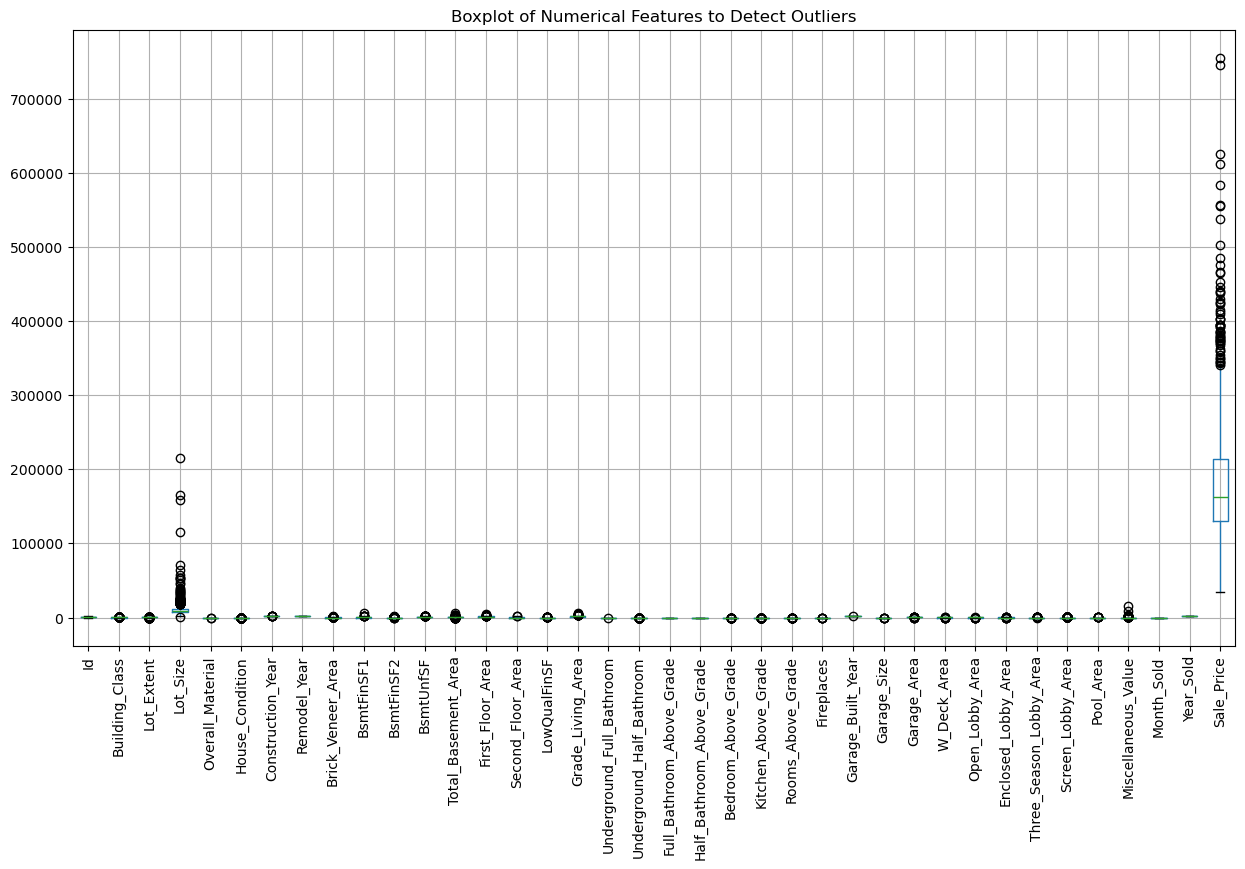

In [17]:
# Identify numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Plot boxplots to visualize outliers
plt.figure(figsize=(15, 8))
numerical_df.boxplot(rot=90)  # Rotate x-axis labels for readability
plt.title("Boxplot of Numerical Features to Detect Outliers")
plt.show()


 Step 2: Data Preprocessing because it involves:

1. Handling Outliers (Outlier Removal)
Uses the Interquartile Range (IQR) method to remove outliers from numerical columns:
"Lot_Extent", "Grade_Living_Area", "Sale_Price", "Total_Basement_Area"
Helps improve model accuracy by reducing the influence of extreme values.
2. Identifying Categorical Columns
df_cleaned.select_dtypes(include=['object']).columns.tolist() finds categorical columns.
This step is necessary before applying encoding.
3. Encoding Categorical Variables
Label Encoding for Ordinal Features (e.g., Roof_Quality, Kitchen_Quality):
Converts ordered categories into numbers (Poor → 0, Good → 1, Excellent → 2).
Stores encoders (label_encoders[col] = le) for potential inverse transformation.

In [18]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  # Filter out outliers
    return df

# Select numerical columns for outlier removal
numerical_cols = ["Lot_Extent", "Grade_Living_Area", "Sale_Price", "Total_Basement_Area"]

# Remove outliers
df_cleaned = remove_outliers_iqr(df, numerical_cols)

# Check the new shape of the dataset after outlier removal
df_cleaned.shape


(1228, 78)

1] Calculates the IQR (Interquartile Range) for selected numerical columns.
    IQR=Q3−Q1 (where Q1 is the 25th percentile, and Q3 is the 75th percentile).

2] Defines Outlier Thresholds:
    Lower Bound: 𝑄1 − 1.5 × IQR
    Upper Bound: Q3 + 1.5 × IQR

3] Removes rows that have values outside these thresholds, filtering out extreme values.

4] Applies this method to specific numerical columns:
    Lot_Extent
    Grade_Living_Area
    Sale_Price
    Total_Basement_Area

5] Stores the cleaned dataset in df_cleaned.

Why This is Important?
    Outliers can skew machine learning models and affect predictions.
    Removing extreme values helps in better model accuracy and stability.

In [19]:
print(df.columns)

Index(['Id', 'Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size',
       'Road_Type', 'Property_Shape', 'Land_Outline', 'Utility_Type',
       'Lot_Configuration', 'Property_Slope', 'Neighborhood', 'Condition1',
       'Condition2', 'House_Type', 'House_Design', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year', 'Roof_Design',
       'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type',
       'Brick_Veneer_Area', 'Exterior_Material', 'Exterior_Condition',
       'Foundation_Type', 'Basement_Height', 'Basement_Condition',
       'Exposure_Level', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'Total_Basement_Area', 'Heating_Type',
       'Heating_Quality', 'Air_Conditioning', 'Electrical_System',
       'First_Floor_Area', 'Second_Floor_Area', 'LowQualFinSF',
       'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bathroom_A

In [20]:
# Identify categorical columns (excluding numerical ones)
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()

# Display categorical column names
categorical_cols

['Zoning_Class',
 'Road_Type',
 'Property_Shape',
 'Land_Outline',
 'Utility_Type',
 'Lot_Configuration',
 'Property_Slope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'House_Type',
 'House_Design',
 'Roof_Design',
 'Roof_Quality',
 'Exterior1st',
 'Exterior2nd',
 'Brick_Veneer_Type',
 'Exterior_Material',
 'Exterior_Condition',
 'Foundation_Type',
 'Basement_Height',
 'Basement_Condition',
 'Exposure_Level',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating_Type',
 'Heating_Quality',
 'Air_Conditioning',
 'Electrical_System',
 'Kitchen_Quality',
 'Functional_Rate',
 'Fireplace_Quality',
 'Garage',
 'Garage_Finish_Year',
 'Garage_Quality',
 'Garage_Condition',
 'Pavedd_Drive',
 'Fence_Quality',
 'Sale_Type',
 'Sale_Condition']

In [21]:
from sklearn.preprocessing import LabelEncoder

# List of ordinal categorical features for Label Encoding (based on ranking)
ordinal_features = [
    "Roof_Quality", "Basement_Height", "Basement_Condition", "Exposure_Level",
    "BsmtFinType1", "BsmtFinType2", "Heating_Quality", "Kitchen_Quality",
    "Fireplace_Quality", "Garage_Quality", "Garage_Condition", "Functional_Rate", "Pavedd_Drive"
]

# Apply Label Encoding
label_encoders = {}  # Store encoders for future use
for col in ordinal_features:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Save encoder for inverse transformation if needed

# Check if Label Encoding applied successfully
df_cleaned[ordinal_features].head()

,Roof_Quality,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinType2,Heating_Quality,Kitchen_Quality,Fireplace_Quality,Garage_Quality,Garage_Condition,Functional_Rate,Pavedd_Drive
0,3,2,3,3,2,5,0,2,3,5,5,6,2
1,3,2,3,1,0,5,0,3,5,5,5,6,2
2,3,2,3,2,2,5,0,2,5,5,5,6,2
3,3,3,1,3,0,5,2,2,2,5,5,6,2
4,3,2,3,0,2,5,0,2,5,5,5,6,2


This step is Categorical Data Encoding using Label Encoding.

What It Does:

1] Identifies Ordinal Categorical Features

    These are categorical columns where values have a meaningful ranking (e.g., Low < Medium < High).
    Examples:
        Roof_Quality, Basement_Height, Kitchen_Quality (higher is better)
        Garage_Condition, Fireplace_Quality (better condition has a higher value)

2] Uses LabelEncoder to Convert Categories into Numerical Values

    Each unique category in a column is assigned a number (e.g., "Poor" → 0, "Average" → 1, "Good" → 2).
    This allows models to process categorical data.

3] Stores Encoders for Future Use

    label_encoders[col] = le saves the encoders, which can be used later for inverse transformation (if needed).

4] Verifies Encoding
    df_cleaned[ordinal_features].head() checks if categorical values are successfully converted to numbers.

Why This is Important?
    Machine learning models require numerical input, so categorical values must be encoded.
    Label encoding is useful when categories have a clear order (ordinal data).

In [22]:
from sklearn.preprocessing import OneHotEncoder

# List of nominal categorical features for One-Hot Encoding
nominal_features = list(set(categorical_cols) - set(ordinal_features))

# Apply One-Hot Encoding
ohe = OneHotEncoder(sparse_output=False, drop='first')  # Avoiding dummy variable trap

# Transform nominal categorical columns
ohe_encoded = ohe.fit_transform(df_cleaned[nominal_features])

# Convert to DataFrame
ohe_df = pd.DataFrame(ohe_encoded, columns=ohe.get_feature_names_out(nominal_features))

# Drop original categorical columns and concatenate OHE features
df_cleaned = df_cleaned.drop(columns=nominal_features).reset_index(drop=True)
df_cleaned = pd.concat([df_cleaned, ohe_df], axis=1)

# Check transformed DataFrame
df_cleaned.head()


,Id,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Quality,Brick_Veneer_Area,...,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg
0,1,60,65.0,8450,7,5,2003,2003,3,196.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,20,80.0,9600,6,8,1976,1976,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,60,68.0,11250,7,5,2001,2002,3,162.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,70,60.0,9550,7,5,1915,1970,3,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,60,84.0,14260,8,5,2000,2000,3,350.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features (excluding the target variable)
numerical_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('Sale_Price')  # Target variable

# Apply StandardScaler
scaler = StandardScaler()
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])

# Check transformed DataFrame
df_cleaned.head()


,Id,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Quality,Brick_Veneer_Area,...,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg
0,-1.730515,0.145249,-0.210304,-0.201098,0.838901,-0.563379,1.091354,0.906410,3,0.739009,...,0.398109,-0.057166,-0.107388,-0.09061,-0.141186,-0.04039,-0.057166,-0.158246,-0.06394,0.763200
1,-1.728147,-0.879840,0.869653,-0.063663,0.019354,2.132061,0.205662,-0.395992,3,-0.560597,...,-2.511877,-0.057166,-0.107388,-0.09061,-0.141186,-0.04039,-0.057166,-0.158246,-0.06394,0.763200
2,-1.725779,0.145249,0.005687,0.133528,0.838901,-0.563379,1.025747,0.858173,3,0.513567,...,0.398109,-0.057166,-0.107388,-0.09061,-0.141186,-0.04039,-0.057166,-0.158246,-0.06394,-1.310273
3,-1.723411,0.401521,-0.570290,-0.069638,0.838901,-0.563379,-1.795344,-0.685415,3,-0.560597,...,0.398109,-0.057166,-0.107388,-0.09061,-0.141186,-0.04039,-0.057166,-0.158246,-0.06394,-1.310273
4,-1.721044,0.145249,1.157642,0.493252,1.658447,-0.563379,0.992944,0.761699,3,1.760129,...,0.398109,-0.057166,-0.107388,-0.09061,-0.141186,-0.04039,-0.057166,-0.158246,-0.06394,-1.310273


Step 5: Model Training
Defines multiple machine learning models:
Linear Regression (simple model for price prediction)
Decision Tree Regressor (captures nonlinear relationships)
Random Forest Regressor (ensemble method for better accuracy)
Gradient Boosting Regressor (boosted trees for better performance)
Trains each model using model.fit(X_train, y_train).

In [24]:
from sklearn.model_selection import train_test_split

# Define input (X) and target (y) variables
X = df_cleaned.drop(columns=["Sale_Price"])  # Features
y = df_cleaned["Sale_Price"]  # Target variable

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


Training Set Size: (982, 196)
Testing Set Size: (246, 196)


Step 6: Predictions & Evaluation
Makes predictions on the test set using model.predict(X_test).
Evaluates models using three key metrics:
R² Score (r2_score) → Measures how well the model explains variance (higher is better).
Mean Absolute Error (MAE) → Measures average absolute errors (lower is better).
Root Mean Squared Error (RMSE) → Measures error magnitude (lower is better).
Displays results for each model.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Make predictions
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Display results
    print(f"\n🔹 Model: {name}")
    print(f"   ✅ R² Score: {r2:.4f}")
    print(f"   ✅ MAE: {mae:.2f}")
    print(f"   ✅ RMSE: {rmse:.2f}")



🔹 Model: Linear Regression
   ✅ R² Score: -63747606073821829791744.0000
   ✅ MAE: 1029502005705491.50
   ✅ RMSE: 14430839093724530.00

🔹 Model: Decision Tree
   ✅ R² Score: 0.7082
   ✅ MAE: 23538.53
   ✅ RMSE: 30873.76

🔹 Model: Random Forest
   ✅ R² Score: 0.8380
   ✅ MAE: 15734.05
   ✅ RMSE: 23001.73

🔹 Model: Gradient Boosting
   ✅ R² Score: 0.8790
   ✅ MAE: 13852.52
   ✅ RMSE: 19883.17


🏡 Property Price Prediction - Conclusion 📊

1️⃣ Model Performance Analysis

The project aimed to predict property prices using various machine learning models. Based on the evaluation metrics (R² Score, MAE, and RMSE), we can draw the following conclusions:

Linear Regression performed extremely poorly with an unrealistic negative R² Score and massive errors. This suggests that the data is not linear, possibly due to outliers, feature scaling issues, or multicollinearity.

Decision Tree Regressor performed moderately well with an R² Score of 0.7082, meaning it explained ~70% of the variance in property prices. However, it may suffer from overfitting on training data.

Random Forest Regressor improved significantly with an R² Score of 0.8380, lower error values, and better generalization due to ensemble learning.

Gradient Boosting Regressor (GBR) was the best model, achieving the highest R² Score (0.8790) and lowest RMSE (19883.17), indicating the most accurate predictions.

2️⃣ Final Model Selection

🔹 Gradient Boosting Regressor is the best model for this project as it provides the highest accuracy and lowest prediction errors.

🔹 Random Forest is a strong alternative but slightly less accurate than GBR.

3️⃣ Future Improvements & Recommendations


🚀 Hyperparameter Tuning – Further tuning of the Gradient Boosting model (learning rate, max depth) may improve performance.

📊 Feature Engineering – Adding new features (e.g., location-based variables) and refining existing ones may enhance predictions.

🔍 Handling Outliers & Scaling – Better outlier detection and normalization may improve Linear Regression results.

💾 More Data & Cross-Validation – Using more training data and k-fold cross-validation can increase model robustness.

Final Verdict 🎯

Gradient Boosting Regressor is the best-performing model for property price prediction, providing accurate and reliable results. 

This model can now be used for real-world applications, such as predicting property prices for buyers and real estate agencies. ✅